### Importing Libraries and downloading dataSet

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix


In [7]:
df = pd.read_csv('iris (2).data',
                names=["Sepal_Length_in_cm","Sepal_Width_in_cm","Petal_Length_in_cm","Petal_Width_in_cm","Species_Flower"])
df

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sepal_Length_in_cm  150 non-null    float64
 1   Sepal_Width_in_cm   150 non-null    float64
 2   Petal_Length_in_cm  150 non-null    float64
 3   Petal_Width_in_cm   150 non-null    float64
 4   Species_Flower      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.head(15)

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm,Species_Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [10]:
df.shape

(150, 5)

In [11]:
df.describe()

,Sepal_Length_in_cm,Sepal_Width_in_cm,Petal_Length_in_cm,Petal_Width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Visualization

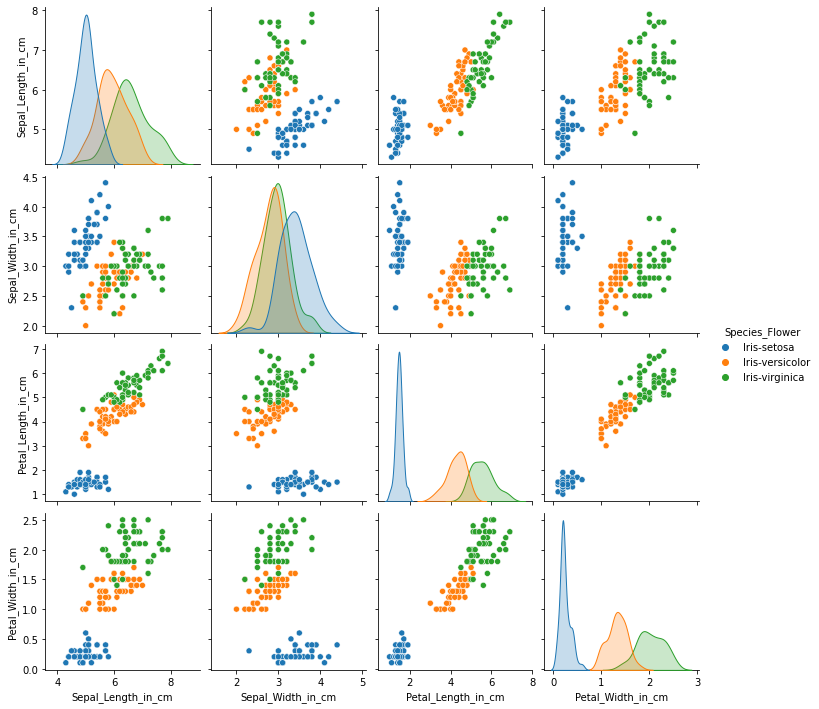

In [12]:
sns.pairplot(df,hue="Species_Flower")

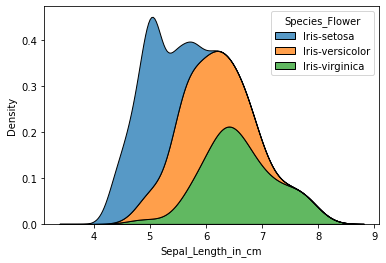

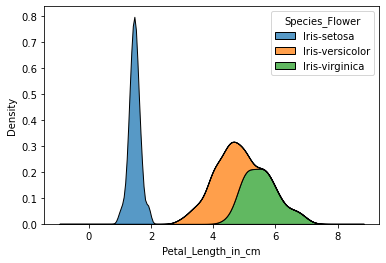

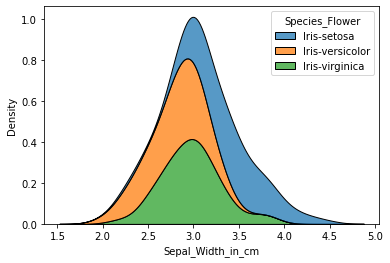

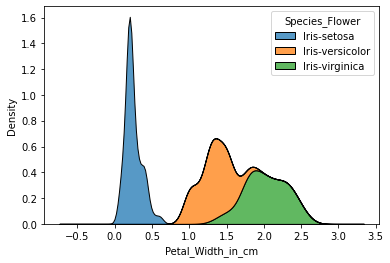

In [13]:
sns.kdeplot(data=df, x="Sepal_Length_in_cm", hue="Species_Flower", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Petal_Length_in_cm", hue="Species_Flower", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Sepal_Width_in_cm", hue="Species_Flower", multiple="stack")
plt.show()
sns.kdeplot(data=df, x="Petal_Width_in_cm", hue="Species_Flower", multiple="stack")
plt.show()

<AxesSubplot:xlabel='Sepal_Width_in_cm', ylabel='Petal_Width_in_cm'>

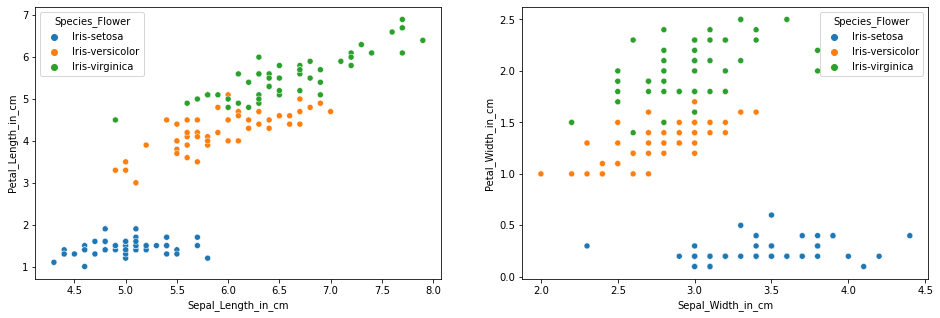

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(16,5))
sns.scatterplot(x='Sepal_Length_in_cm',y='Petal_Length_in_cm',data=df,hue='Species_Flower',ax=ax1)
sns.scatterplot(x='Sepal_Width_in_cm',y='Petal_Width_in_cm',data=df,hue='Species_Flower',ax=ax2)

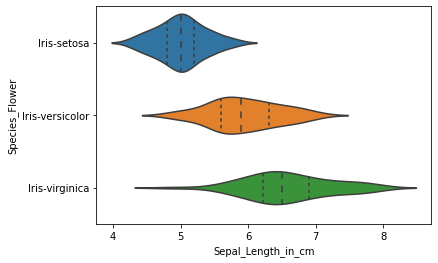

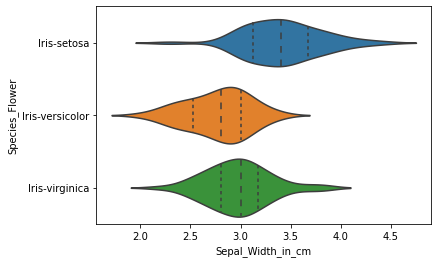

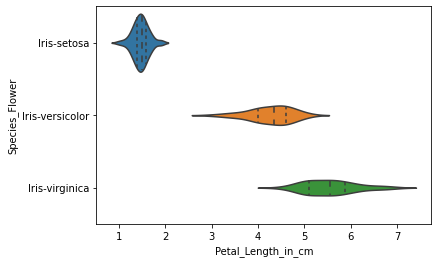

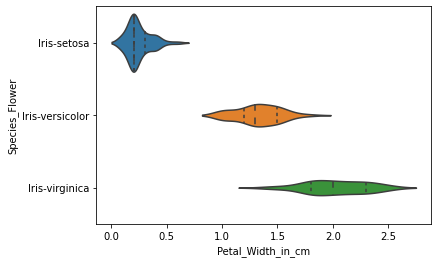

In [15]:
sns.violinplot(y='Species_Flower', x='Sepal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Sepal_Width_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Length_in_cm', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species_Flower', x='Petal_Width_in_cm', data=df, inner='quartile')
plt.show()

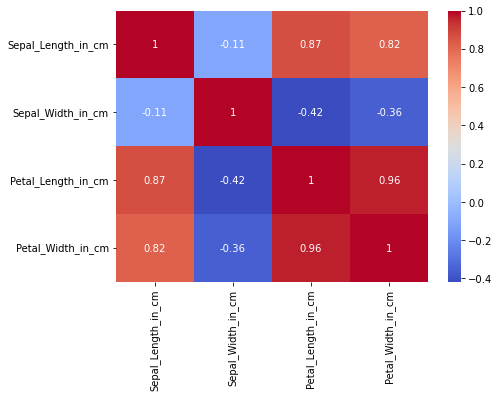

In [16]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
plt.show()

### Building, Training and Testing Model

In [65]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
X = X.apply(pd.to_numeric, errors='coerce')
Y = Y.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

##### 1- Linear Regression

In [66]:
model1=LinearRegression()

In [67]:
model1.fit(x_train, y_train)

LinearRegression()

In [68]:
y_pred=model1.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [69]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))


In [70]:
print('Linear Regression')
report(model1)
print(f'Accuracy: {round(score*100,2)}%')

Linear Regression
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        45

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Accuracy: 100.0%


##### 2- Linear SVC

In [71]:
X = df.drop(columns=['Species_Flower'])
Y = df['Species_Flower']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.3)

In [72]:
l_svc=LinearSVC()

In [73]:
l_svc.fit(x_train,y_train)

C:\Users\AADiL SAleem\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC()

In [75]:
y_pred=l_svc.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [76]:
def report(model):
    preds=model.predict(x_test)
    print(classification_report(preds,y_test))
    plot_confusion_matrix(model,x_test,y_test)

Linear SVC
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.76      1.00      0.86        16
 Iris-virginica       1.00      0.72      0.84        18

       accuracy                           0.89        45
      macro avg       0.92      0.91      0.90        45
   weighted avg       0.92      0.89      0.89        45

Accuracy: 88.89%


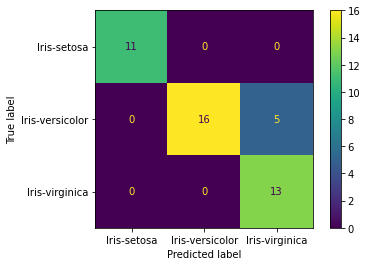

In [78]:
print('Linear SVC')
report(l_svc)
print(f'Accuracy: {round(score*100,2)}%')

##### 3- Multinomial Naive Bayes

In [79]:
MNB=MultinomialNB()

In [80]:
MNB.fit(x_train,y_train)

MultinomialNB()

In [82]:
y_pred=MNB.predict(x_test)
score=accuracy_score(y_test,y_pred)

Multinomial NB
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.00      0.00      0.00         0
 Iris-virginica       1.00      0.38      0.55        34

       accuracy                           0.53        45
      macro avg       0.67      0.46      0.52        45
   weighted avg       1.00      0.53      0.66        45

 Accuracy: 53.33%


C:\Users\AADiL SAleem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AADiL SAleem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AADiL SAleem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


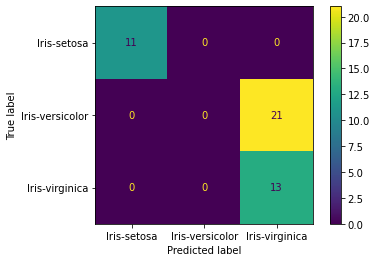

In [83]:
print('Multinomial NB')
report(MNB)
print(f' Accuracy: {round(score*100,2)}%')

##### 4- Decision Tree Classifier

In [87]:
DTC =DecisionTreeClassifier()

In [88]:
DTC.fit(x_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred=DTC.predict(x_test)
score=accuracy_score(y_test,y_pred)

Decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      0.95      0.90        19
 Iris-virginica       0.92      0.80      0.86        15

       accuracy                           0.91        45
      macro avg       0.93      0.92      0.92        45
   weighted avg       0.91      0.91      0.91        45

 Accuracy: 93.33%


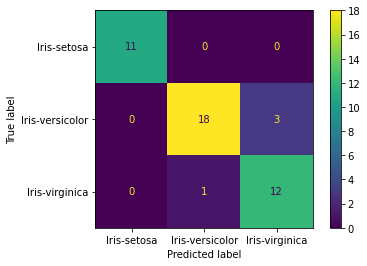

In [95]:
print("Decision Tree Classifier")
report(DTC)
print(f' Accuracy: {round(score*100,2)}%')

##### 5- KNN

In [91]:
KNN=KNeighborsClassifier()

In [92]:
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [94]:
y_pred=KNN.predict(x_test)
score=accuracy_score(y_test,y_pred)

KNN
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.86      1.00      0.92        18
 Iris-virginica       1.00      0.81      0.90        16

       accuracy                           0.93        45
      macro avg       0.95      0.94      0.94        45
   weighted avg       0.94      0.93      0.93        45

 Accuracy: 93.33%


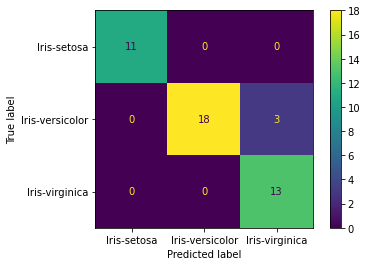

In [96]:
print("KNN")
report(KNN)
print(f' Accuracy: {round(score*100,2)}%')